In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
N, D_in, H, D_out = 2, 100, 50, 1

In [3]:
x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)

print(x.shape)
print(y.shape)
# print(x)
# print("========================================================================")
# print(y)

(2, 100)
(2, 1)


In [4]:
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

print(w1.shape)
print(w2.shape)

(100, 50)
(50, 1)


In [5]:
y_pred_list = list()
loss_list = list()
learning_rate = 1e-6
for t in range(500):
    h = x.dot(w1)
    h_relu = np.maximum(h, 0)
    y_pred = h_relu.dot(w2)
    y_pred_list.append(y_pred[0][0])
    
    loss = np.square(y_pred - y).sum()
    loss_list.append(loss)
    print(t, loss)
    
    grad_y_pred = 2.0 * (y_pred - y)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    grad_h_relu = grad_y_pred.dot(w2.T)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

0 1095.682918591565
1 1073.9220426762488
2 1052.596812249525
3 1031.6983770196841
4 1011.2180714096672
5 991.1474105132476
6 971.478086146889
7 952.2019629948022
8 933.3110748446809
9 914.7976209117966
10 896.6539622491176
11 878.8726182411824
12 861.4462631796224
13 844.3677229181582
14 827.6299716050615
15 811.2261284910679
16 795.1494548108396
17 779.3933507360741
18 763.9513523984692
19 748.8171289807478
20 733.9844798740495
21 719.4473319000094
22 705.1997365959049
23 691.2358675613003
24 677.5500178646569
25 664.1365975084217
26 650.9901309511536
27 638.1052546852676
28 625.4767148690639
29 613.0993650116696
30 600.9681637096323
31 589.0781724339024
32 577.4245533659921
33 566.002567282089
34 554.8075714840029
35 543.8350177758176
36 533.0804504851241
37 522.5395045278051
38 512.2079035153117
39 502.08145790343474
40 492.1560631815733
41 482.4276981015609
42 472.8924229451126
43 463.546377828972
44 454.3857810469026
45 445.40692744763214
46 436.60618684793116
47 427.9800024800102

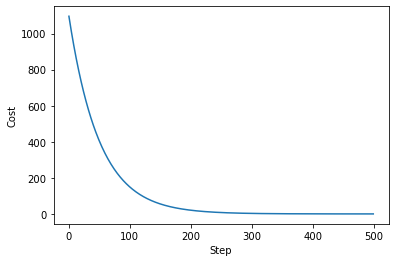

In [7]:
step_list = [i for i in range(len(loss_list))]
plt.plot(step_list, loss_list)
plt.ylabel('Cost')
plt.xlabel('Step')
plt.show()